<a href="https://colab.research.google.com/github/goktuggokmen/nutritional-values-data-processing-and-visualization/blob/main/besi%CC%87n_degerleri%CC%87_veri%CC%87leri%CC%87ni%CC%87n_i%CC%87slenmesi%CC%87_ve_gorsellesti%CC%87ri%CC%87lmesi%CC%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***PROJEMİZİN AMACI GIDALARIN BESİN DEĞERLERİNİ İŞLEYEREK VERİLERİ GÖRSELLEŞTİRMEKTİR.***

# 1.HAZIRLAYANLAR
#*   Göktuğ GÖKMEN
#*   Muhammet Fatih ACUN
#*   Metehan ÇALLI 
#*   Zehra ASLAN
Kaynak ---> Hacettepe Üniversitesi Sağlık Bilimleri Fakültesi Beslenme Ve Diyetetik Bölümü


# 2.KULLANILACAK KÜTÜPHANELERİN YÜKLENMESİ

In [ ]:
import matplotlib.pyplot as plt #numpy çizim kütüphanesi 
import seaborn as sns #istatiksel grafikleri çizdirmek için gerekli kütüphane
import pandas as pd #veri analiz ve işleme için kullanılan kütüphane 
import numpy as np #büyük, çok boyutlu diziler ve matrisler için destek eklerken, bu dizilerde çalışmak için yüksek düzeyli matematiksel işlevlerin geniş bir koleksiyonudur.
import csv #Virgülle ayrılmış değerler dosyası, değerleri ayırmak için virgül kullanan sınırlandırılmış bir metin dosyasıdır. Dosyanın her satırı bir veri kaydıdır. Her kayıt virgülle ayrılmış bir veya daha fazla alandan oluşur. Alan ayırıcı olarak virgül kullanılması, bu dosya formatı için adın kaynağıdır.

# 3.DOSYALARI OKUMA 

In [ ]:
yas_enerji = pd.read_excel("yas_enerji.xlsx") #yaş-enerji ilişkisi içeren tablonun okunması 

In [ ]:
data =pd.read_excel("pyhton_proje.xlsx") #besin değerlerini içeren tablonun okunması

#4.ÖNCELİKLE VERİLERİMİZE BİR GÖZ ATALIM

In [ ]:
#veriye dair genel bilgiler
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448 entries, 0 to 447
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   BESINLER                  438 non-null    object 
 1   SU(g)                     348 non-null    float64
 2   ENERJI(g)                 364 non-null    float64
 3   PROTEIN(g)                354 non-null    float64
 4   YAG(g)                    349 non-null    float64
 5   KARBONHIDRAT(g)           351 non-null    float64
 6   POSA(g)                   299 non-null    float64
 7   KUL(g)                    291 non-null    object 
 8   KALSIYUM(g)               317 non-null    object 
 9   DEMIR(g)                  312 non-null    float64
 10  FOSFOR(g)                 273 non-null    float64
 11  POTASYUM(g)               259 non-null    object 
 12  SODYUM(g)                 258 non-null    object 
 13  VITAMİN A ve KAROTEIN IU  263 non-null    object 
 14  TIAMIN (mg

In [ ]:
# ilk 30 veri #

data.head(30)   

,BESINLER,SU(g),ENERJI(g),PROTEIN(g),YAG(g),KARBONHIDRAT(g),POSA(g),KUL(g),KALSIYUM(g),DEMIR(g),FOSFOR(g),POTASYUM(g),SODYUM(g),VITAMİN A ve KAROTEIN IU,TIAMIN (mg),RIBOFLAVIN (mg),NILASIN(mg),VITAMIN C (mg),ARTIK (%),KAFEIN(mg/100 mL)
0,ET VE ÜRÜNLERİ:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BILDIRCIN,70.0,192.0,19.6,12.1,0.0,0.0,0.9,13,4.0,275.0,216,53,243,0.24,0.26,7.5,6.0,10.0,0
2,GUVERCIN,57.0,294.0,18.5,23.8,0.0,0.0,1.4,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0,0
3,SULUN,68.0,181.0,22.7,9.3,0.0,0.0,1.3,12,1.2,214.0,243,40,177,0.07,0.14,6.4,5.0,14.0,0
4,TAVSAN,70.0,162.0,21.0,8.0,0.0,0.0,1,20,1.3,352.0,385,43,NaN,0.08,0.06,12.8,NaN,21.0,0
5,ALABALIK,70.6,168.0,18.3,10.0,0.0,0.0,1.1,NaN,0.8,238.0,NaN,NaN,NaN,0.05,0.12,2.7,NaN,63.0,0
6,BALIK UNU,2.0,336.0,78.0,0.3,NaN,0.0,19.7,4610,41.0,3100.0,430,170,NaN,0.07,0.62,22,NaN,0.0,0
7,KALKAN,71.4,193.0,14.8,14.4,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.14,NaN,NaN,NaN,0
8,KILIC,64.6,164.0,26.3,5.6,NaN,0.0,1.3,17,1.2,258.0,NaN,NaN,1928,0.03,0.04,10.3,NaN,NaN,0
9,LEVREK,79.3,93.0,19.2,1.2,0.0,0.0,1.2,21,1.1,180.0,256,68,NaN,0.07,0.07,14.2,NaN,61.0,0


In [ ]:
# son 30 veri#
data.tail(30)

,BESINLER,SU(g),ENERJI(g),PROTEIN(g),YAG(g),KARBONHIDRAT(g),POSA(g),KUL(g),KALSIYUM(g),DEMIR(g),FOSFOR(g),POTASYUM(g),SODYUM(g),VITAMİN A ve KAROTEIN IU,TIAMIN (mg),RIBOFLAVIN (mg),NILASIN(mg),VITAMIN C (mg),ARTIK (%),KAFEIN(mg/100 mL),KAYNAK NO.
418,LIKORLER(AHUDUDU),NaN,274.0,0.0,NaN,24.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
419,LIKORLER(NANE),NaN,356.0,0.0,NaN,36.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
420,LIKORLER(PORTAKAL),NaN,400.0,0.0,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
421,LIKORLER(MUZ),NaN,315.0,0.0,NaN,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
422,ALKOLSUZ ICECEKLER:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
423,ADACAYI(KURU),7.9,315.0,12.7,12.7,60.7,NaN,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
424,ALKOLSUZ BIRA,89.5,41.0,NaN,NaN,10.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
425,CAY,3.8,294.0,NaN,NaN,80.5,NaN,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
426,IHLAMUR,91.0,42.0,1.4,1.4,6.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
427,KAHVE(CEKIRDEK),NaN,290.0,16.5,16.5,22.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [ ]:
data.describe() #kolonların istatiksel bilgileri

,SU(g),ENERJI(g),PROTEIN(g),YAG(g),KARBONHIDRAT(g),POSA(g),DEMIR(g),FOSFOR(g),VITAMIN C (mg),ARTIK (%)
count,348.000000,364.000000,354.000000,349.000000,351.000000,299.000000,312.000000,273.000000,232.000000,261.000000
mean,48.102011,257.260989,9.851695,14.391135,24.816527,1.492324,5.014144,208.139744,16.922466,10.678161
std,35.166719,211.703495,10.833343,24.521024,27.646130,3.330033,11.743068,284.085855,37.026386,16.038771
min,-7.600000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.300000,74.500000,1.200000,0.400000,2.500000,0.000000,0.600000,40.000000,0.000000,0.000000
50%,56.850000,242.500000,6.500000,2.600000,10.600000,0.400000,1.500000,139.000000,2.000000,0.000000
75%,81.925000,356.000000,16.775000,15.800000,50.000000,1.500000,4.300000,274.000000,18.250000,19.000000
max,100.000000,902.000000,86.000000,100.000000,99.500000,26.300000,124.000000,3100.000000,369.000000,74.000000


In [ ]:
data.columns #kolonların adlarını verir

Index(['      BESİNLER', 'SU(g)', 'ENERJİ(g)', 'PROTEİN(g)', 'YAĞ(g)',
       'KARBONHİDRAT(g)', 'POSA(g)', 'KÜL(g)', 'KALSİYUM(g)', 'DEMİR(g)',
       'FOSFOR(g)', 'POTASYUM(g)', 'SODYUM(g)', 'VİTAMİN A ve KAROTEİN IU',
       'TİAMİN (mg)', 'RİBOFLAVİN (mg)', 'NİLASİN(mg)', 'VİTAMİN C (mg)',
       'ARTIK (%)', 'KAYNAK NO.', 'Kafein(mg/100 mL)'],
      dtype='object')

In [ ]:
# veri dosyasının boyutunu inceleyelim #

data.ndim  

2

In [ ]:
#veri boyutu
data.shape

(448, 20)

In [ ]:
#Kullanıcı tarafından girilen bir besinin besin değerlerine erişme 
copy_data = data.set_index('BESINLER') #data'nın içeriğini "BESINLER" sütununu index olacak şekilde copy_data'ya kopyalıyoruz
besin = input("Besin degerlerini merak ettiğiniz yiyecek/icecek : ") #besin değerleri merak edilen besini girdi olarak kullanıcıdan alma
new_data = copy_data.loc[besin] #"BESINLER" sütununu indeks olarak belirlediğimiz copy_data verisinden kullanıcı tarafından girilen besinin satırına erişme
new_data

Besin degerlerini merak ettiğiniz yiyecek/icecek : SUCUK


SU(g)                       31.9
ENERJI(g)                    452
PROTEIN(g)                  21.4
YAG(g)                      40.8
KARBONHIDRAT(g)              NaN
POSA(g)                        0
KUL(g)                       NaN
KALSIYUM(g)                   45
DEMIR(g)                    12.9
FOSFOR(g)                    NaN
POTASYUM(g)                  NaN
SODYUM(g)                    NaN
VITAMİN A ve KAROTEIN IU       0
TIAMIN (mg)                  NaN
RIBOFLAVIN (mg)              NaN
NILASIN(mg)                  NaN
VITAMIN C (mg)               NaN
ARTIK (%)                      0
KAFEIN(mg/100 mL)              0
Name: SUCUK, dtype: object

# **5.GRAFİK OLUŞTURMA AŞAMASI**

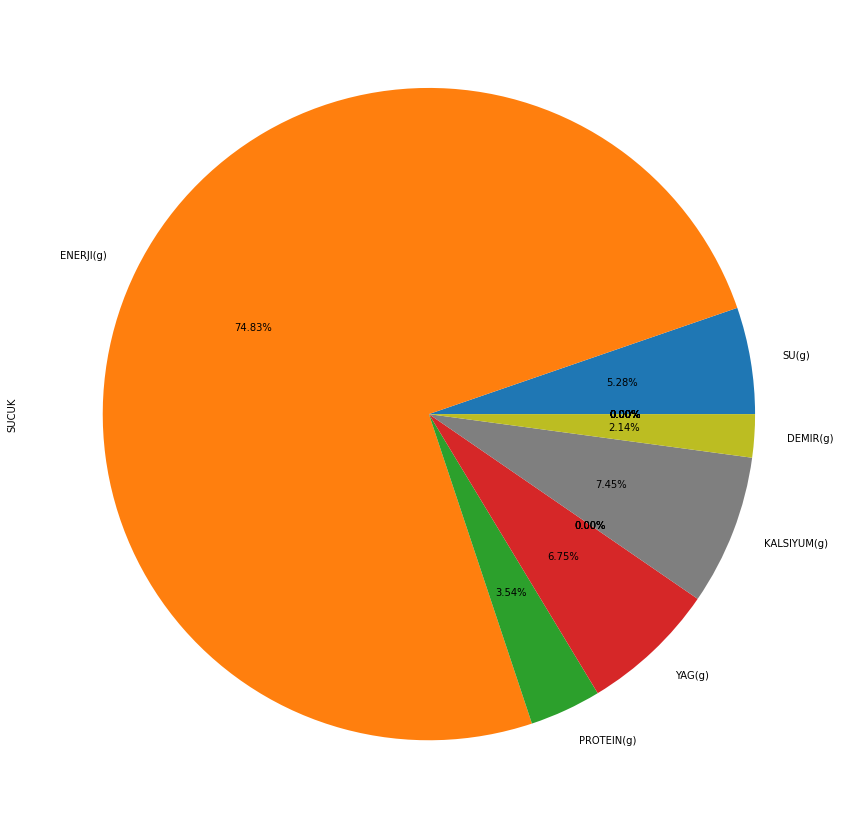

In [ ]:
#Kullanıcı tarafından girilen besinin dairesel grafiği
new_data.plot.pie(subplots = True ,figsize = (20,15),autopct = '%1.2f%%' , textprops={'fontsize': 10})

# **VERİLER İÇERİSİNDEKİ YAĞ KOLONUNUN SAYI DEĞERLERİNE GÖRE DAĞILIMININ GÖRSELLEŞTİRİLMESİ**

In [ ]:
data['YAG(g)'].describe() #"YAG(g)" kolonunun istatistikleri

count    349.000000
mean      14.391135
std       24.521024
min        0.000000
25%        0.400000
50%        2.600000
75%       15.800000
max      100.000000
Name: YAG(g), dtype: float64

In [ ]:
data['YAG(g)'].value_counts() #Bu satır verinin NaN dışındaki değerleri sayısal olarak ne kadar içerdiğini verir

0.2      30
0.1      20
0.3      20
100.0    14
0.4      14
         ..
19.4      1
20.4      1
29.4      1
40.8      1
14.9      1
Name: YAG(g), Length: 156, dtype: int64

In [ ]:
#en yüksek yağ değerine sahip 18 besin
data['YAG(g)']=data['YAG(g)'].astype('category')
yag = data.sort_values(by=['YAG(g)'],ascending=False, na_position='last').head(18)

x_yag = yag.iloc[:,0:1]
x_yag = x_yag.astype(np.str)

y_yag = yag.iloc[:,4:5]
y_yag = y_yag.astype(np.float)

stack_yagmax = pd.concat([x_yag,y_yag],axis=0)

print(stack_yagmax)

              BESINLER  YAG(g)
343         BALIK YAGI     NaN
329        HASHAS YAGI     NaN
345        KUYRUK YAGI     NaN
340         ZEYTINYAGI     NaN
339    YERFISTIGI YAGI     NaN
338         SUSAM YAGI     NaN
327      AYCICEGI YAGI     NaN
328        FINDIK YAGI     NaN
337          SOYA YAGI     NaN
336         PAMUK YAGI     NaN
335       PALMIYE YAGI     NaN
334        NEBATI YAGI     NaN
333      MISIROZU YAGI     NaN
330  KETEN TOHUMU YAGI     NaN
346    SADEYAG(ERIMIS)     NaN
331   MARGARIN(MUTFAK)     NaN
344             ICYAGI     NaN
347            TEREYAG     NaN
343                NaN   100.0
329                NaN   100.0
345                NaN   100.0
340                NaN   100.0
339                NaN   100.0
338                NaN   100.0
327                NaN   100.0
328                NaN   100.0
337                NaN   100.0
336                NaN   100.0
335                NaN   100.0
334                NaN   100.0
333                NaN   100.0
330     

Text(0.5, 1.0, 'BESINLER ICERISINDEKI YAG MIKTARI')

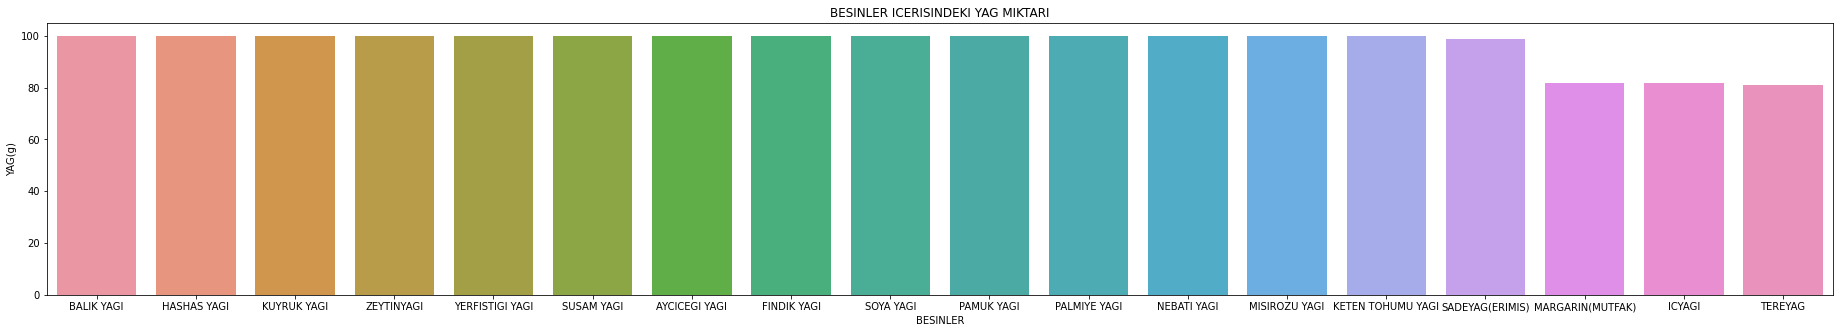

In [ ]:
#en yüksek yağ değerine sahip 18 besinin sütun grafiği
plt.figure(figsize=(32,5),facecolor='white')
sns.barplot(x= "BESINLER", y="YAG(g)", data=stack_yagmax )
plt.title("BESINLER ICERISINDEKI YAG MIKTARI")

In [ ]:
#en düşük yağ değerine sahip 20 besin
data['YAG(g)']=data['YAG(g)'].astype('category')
yag = data.sort_values(by=['YAG(g)'],ascending=True).head(20)

x_yag = yag.iloc[:,0:1]
x_yag = x_yag.astype(np.str)

y_yag = yag.iloc[:,4:5]
y_yag = y_yag.astype(np.float)

stack_yagmin = pd.concat([x_yag,y_yag],axis=1)

print(stack_yagmin)

                  BESINLER  YAG(g)
431  MEYVELI SODALI ICECEK   0.000
209                  SEKER   0.000
408                NESKAFE   0.000
430             MADEN SUYU   0.000
285                    BAL   0.000
429           KOLALI GAZOZ   0.000
284           AKIDE SEKERI   0.000
280           TAVUK(BEYAZ)   0.001
360          BAKING POWDER   0.001
104              ELMA SUYU   0.001
135            UZUM (SUYU)   0.001
314         MISIR(NISASTA)   0.001
106           KIRMIZI ERIK   0.001
230            SOGAN(KURU)   0.100
378              KUS UZUMU   0.100
99                    AYVA   0.100
375                JELATIN   0.100
165        HIYAR(SOYULMUS)   0.100
207           PEKMEZ(UZUM)   0.100
164      HIYAR(SOYULMAMIS)   0.100


Text(0.5, 1.0, 'BESINLER ICERISINDEKI YAG MIKTARI')

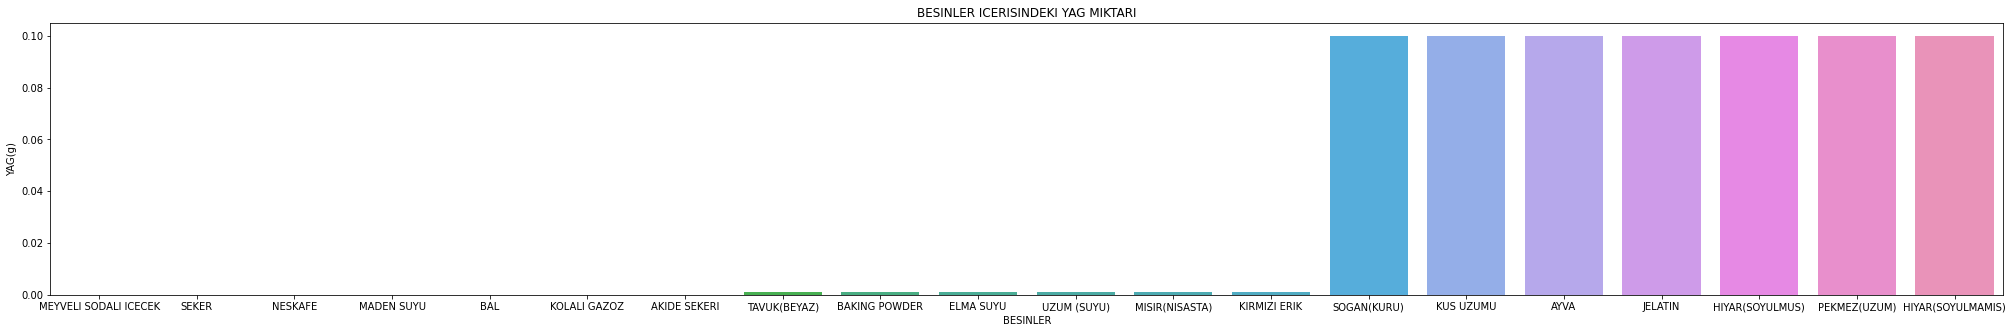

In [ ]:
#en düşük yağ değerine sahip 20 besinin sütun grafiği
plt.figure(figsize=(35,5),facecolor='white')
sns.barplot(x= "BESINLER", y="YAG(g)", data=stack_yagmin )
plt.title("BESINLER ICERISINDEKI YAG MIKTARI")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6087355dd8>],
      dtype=object)

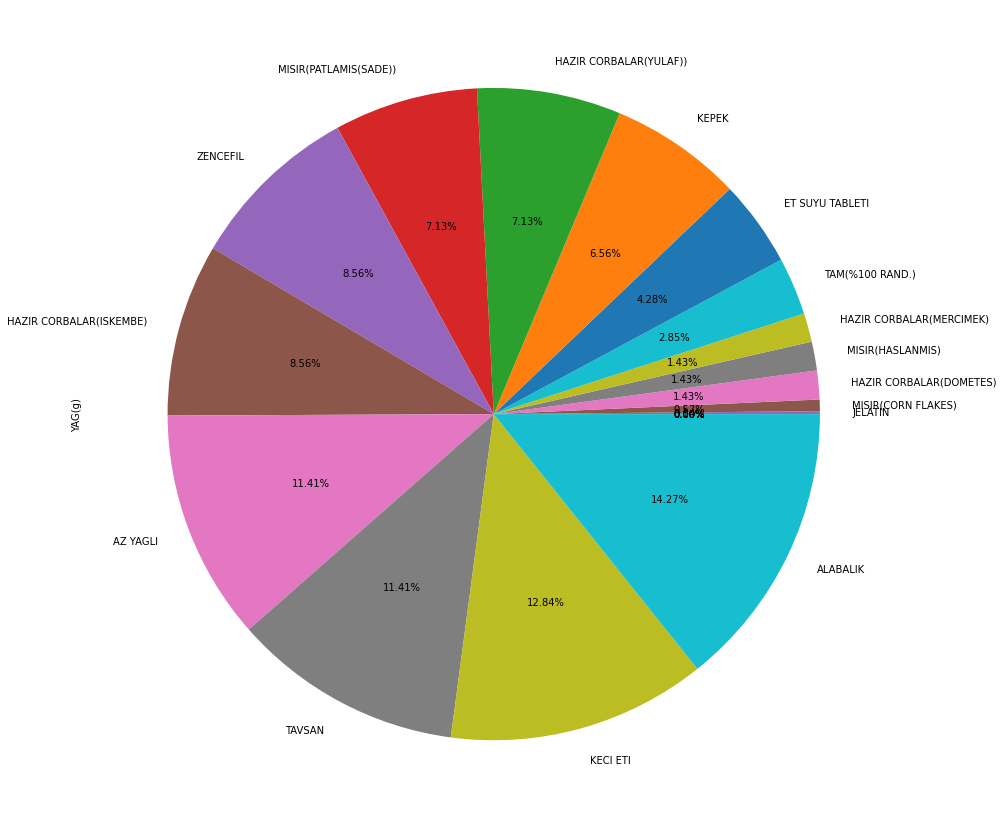

In [ ]:
stack_yag['YAG(g)'].plot.pie(subplots = True, labels= stack_yag['BESINLER'] ,figsize = (15,15),autopct = '%1.2f%%' , textprops={'fontsize': 10})

# **VERİLER İÇERİSİNDEKİ PROTEİN KOLONUNUN SAYI DEĞERLERİNE GÖRE DAĞILIMININ GÖRSELLEŞTİRİLMESİ**

In [ ]:
data['PROTEIN(g)'].describe() #"PROTEIN(g)" kolonunun istatistikleri

count     381
unique    185
top         -
freq       27
Name: PROTEIN(g), dtype: object

In [ ]:
data['PROTEIN(g)'].value_counts() #Bu satır verinin NaN dışındaki değerleri sayısal olarak ne kadar içerdiğini verir

-       27
0       25
1.2      8
0.5      8
0.6      7
        ..
5.1      1
5.2      1
26.9     1
22.4     1
10.3     1
Name: PROTEIN(g), Length: 185, dtype: int64

In [ ]:
#en yüksek protein değerine sahip 20 besin
data['PROTEIN(g)']=data['PROTEIN(g)'].astype('category')
protein = data.sort_values(by=['PROTEIN(g)'], ascending=False, na_position='last').head(20)  

x_protein = protein.iloc[:,0:1]


y_protein = protein.iloc[:,3:4]
y_protein = y_protein.astype(np.float)

stack_protein = pd.concat([x_protein,y_protein],axis=1)

print(stack_protein)

                      BESINLER  PROTEIN(g)
375                    JELATIN        86.0
6                    BALIK UNU        78.0
249              COKELEK(KURU)        54.9
88            SOYA UNU(YAGSIZ)        47.0
87          SOYA UNU(AZ YAGLI)        43.4
379                 MAYA(KURU)        36.9
271            SUTTOZU(YAGSIZ)        36.2
248              COKELEK(TAZE)        35.0
86              SOYA FASULYESI        34.1
40         PASTIRMA (CEMENSIZ)        32.7
77             KABAK CEKIRDEGI        30.0
250                    GRAVYER        29.8
39          PASTIRMA (CEMENLI)        29.5
252              KASAR PEYNIRI        27.0
16                      HAVYAR        26.9
270             SUTTOZU(YAGLI)        26.3
8                        KILIC        26.3
91   YER FISTIGI(IC KAVRULMUS)        26.2
70                   BAKLA(IC)        25.1
251        COKELEK (KARS TIPI)        25.0


Text(0.5, 1.0, 'BESINLER ICERISINDEKI PROTEIN MIKTARI')

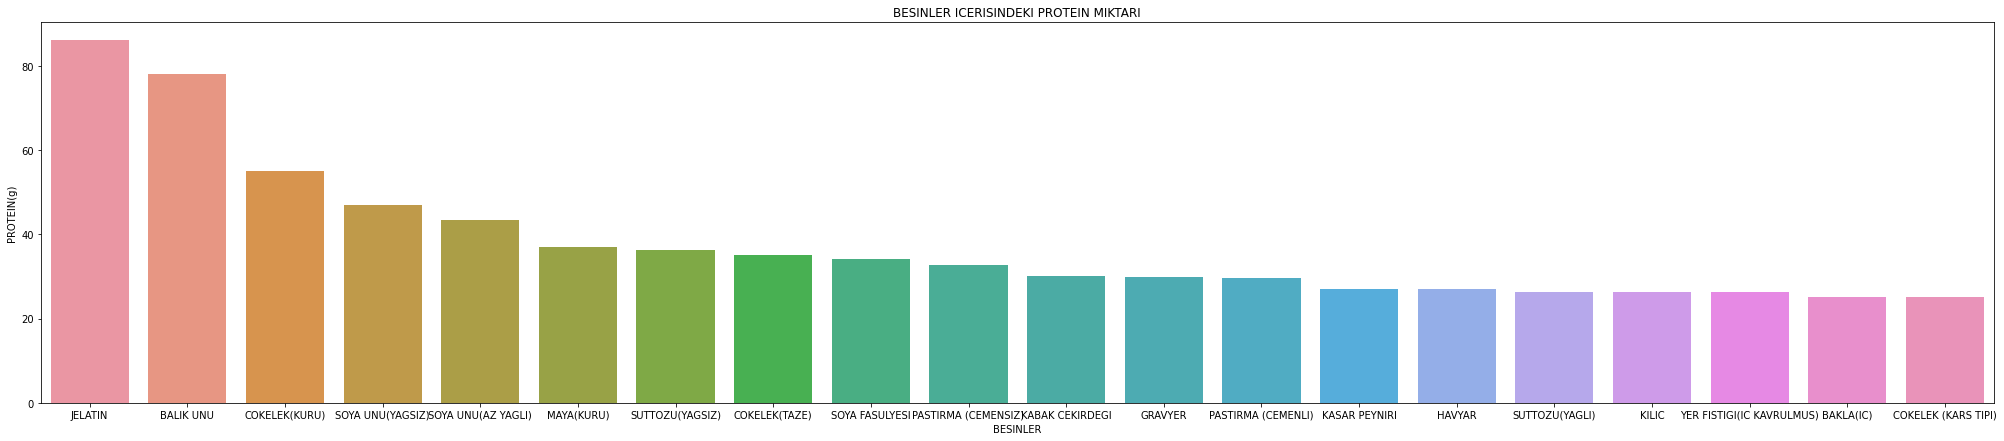

In [ ]:
#en yüksek protein değerine sahip 20 besinin sütun grafiği
plt.figure(figsize=(35,7),facecolor='white')
sns.barplot(x= "BESINLER", y="PROTEIN(g)", data=stack_protein  )
plt.title("BESINLER ICERISINDEKI PROTEIN MIKTARI")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9695065518>],
      dtype=object)

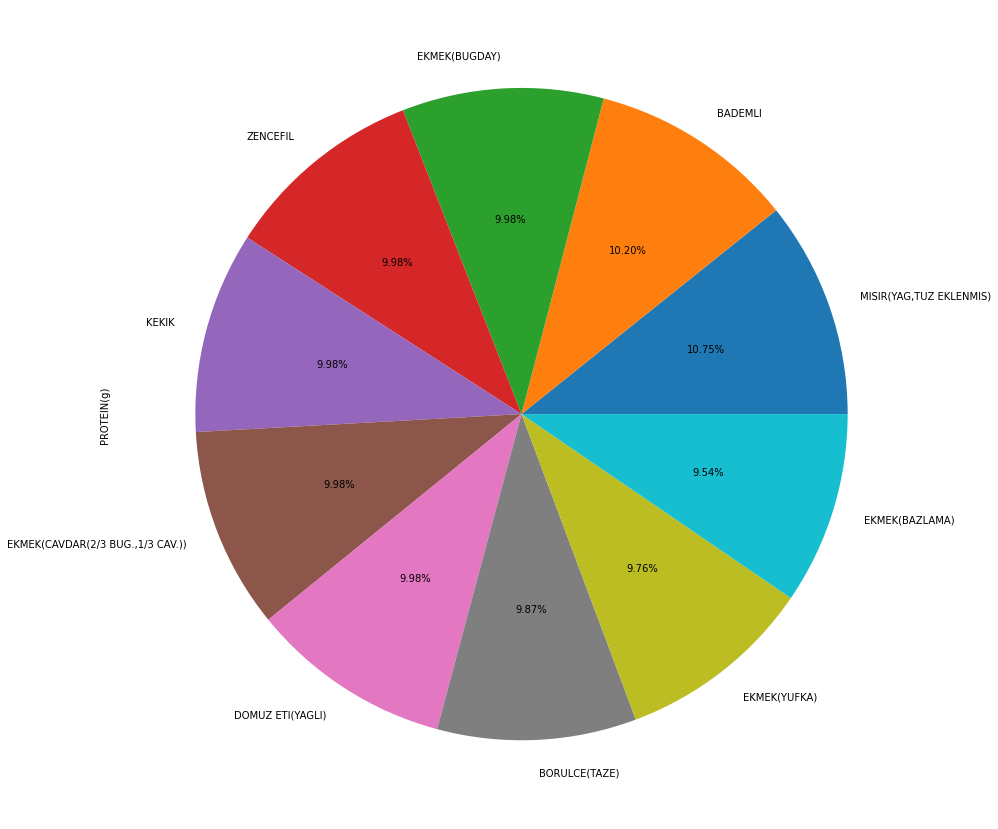

In [ ]:
stack_protein['PROTEIN(g)'].plot.pie(subplots = True ,labels = stack_protein['      BESINLER'] ,figsize = (15,15) , autopct = '%1.2f%%' )

# **VERİLER İÇERİSİNDEKİ KARBONHİDRAT KOLONUNUN SAYI DEĞERLERİNE GÖRE DAĞILIMININ GÖRSELLEŞTİRİLMESİ**

In [ ]:
data['KARBONHIDRAT(g)'].describe() #"KARBONHIDRAT(g)" kolonunun istatistikleri

count    351.000000
mean      24.816527
std       27.646130
min        0.000000
25%        2.500000
50%       10.600000
75%       50.000000
max       99.500000
Name: KARBONHIDRAT(g), dtype: float64

In [ ]:
data['KARBONHIDRAT(g)'].value_counts() #Bu satır verinin NaN dışındaki değerleri sayısal olarak ne kadar içerdiğini verir

0.0     56
52.0     4
1.2      4
5.2      4
3.8      4
        ..
9.8      1
29.8     1
8.4      1
74.8     1
75.2     1
Name: KARBONHIDRAT(g), Length: 222, dtype: int64

In [ ]:
#en yüksek karbonhidrat değerine sahip 20 besin
data['KARBONHIDRAT(g)']=data['KARBONHIDRAT(g)'].astype('category')
karbonhidrat = data.sort_values(by=['KARBONHIDRAT(g)'],na_position='last',ascending=False).head(20)

x_karbonhidrat = karbonhidrat.iloc[:,0:1]
x_karbonhidrat = x_karbonhidrat.astype(np.str)

y_karbonhidrat = karbonhidrat.iloc[:,5:6]
y_karbonhidrat = y_karbonhidrat.astype(np.float)

stack_karbonhidrat = pd.concat([x_karbonhidrat,y_karbonhidrat],axis=1)

print(stack_karbonhidrat)

                   BESINLER  KARBONHIDRAT(g)
209                   SEKER             99.5
109             ERIK PESTIL             91.3
314          MISIR(NISASTA)             87.6
284            AKIDE SEKERI             86.9
222                   MARIE             85.4
312      MISIR(CORN FLAKES)             85.3
121           KAYISI PESTIL             84.6
231              SOGAN(TOZ)             80.7
206        MEYVE(SEKERLEME)             80.6
425                     CAY             80.5
319                  PIRINC             80.4
403             TARCIN(TOZ)             80.0
192             PATATES UNU             80.0
289  BUĞDAY UNU (KEK,PASTA)             79.4
220                    ARPA             78.8
285                     BAL             78.4
292                  BULGUR             78.1
134             UZUM (KURU)             77.4
303                   IRMIK             77.0
318               MISIR(UN)             76.9


Text(0.5, 1.0, 'BESINLER ICERISINDEKI KARBONHIDRAT MIKTARI')

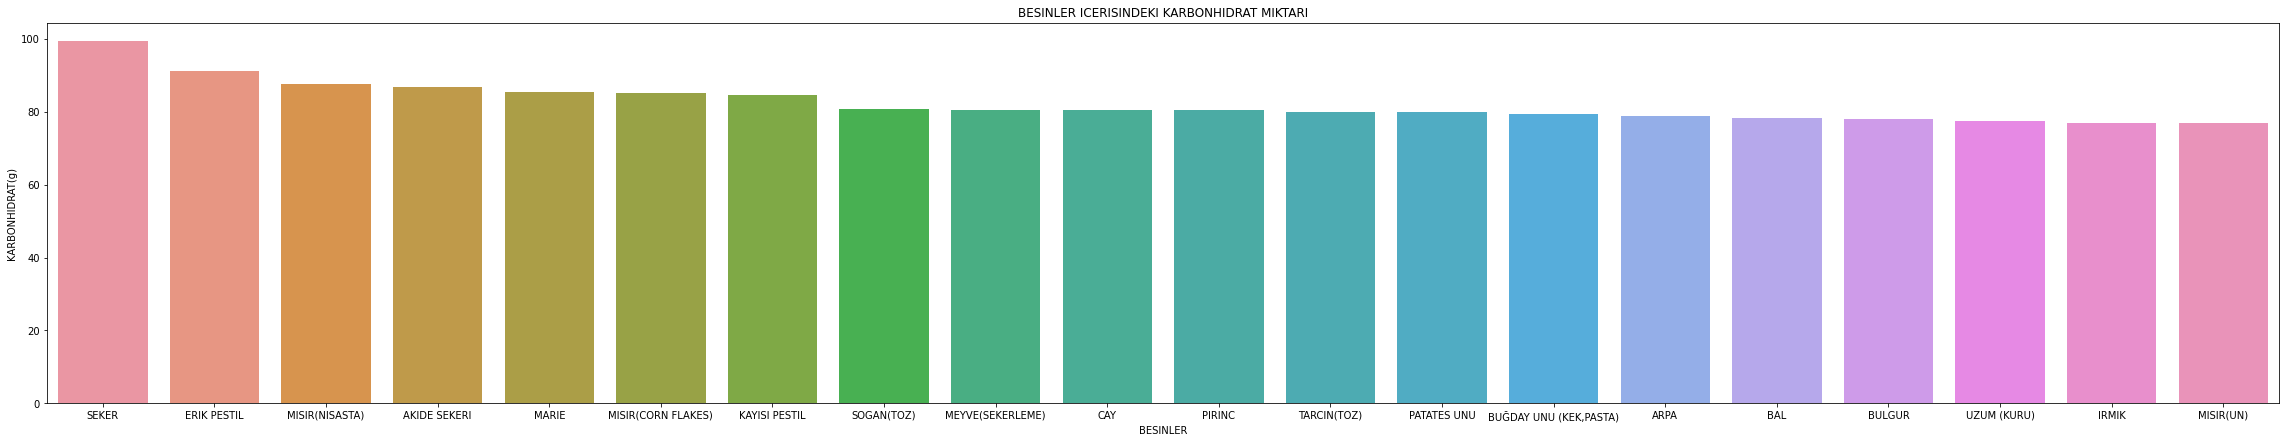

In [ ]:
#en yüksek karbonhidrat değerine sahip 20 besinin sütun grafiği
plt.figure(figsize=(40,7),facecolor='white')

sns.barplot(x="BESINLER", y="KARBONHIDRAT(g)", data=stack_karbonhidrat  )
plt.title("BESINLER ICERISINDEKI KARBONHIDRAT MIKTARI")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9690f90a20>],
      dtype=object)

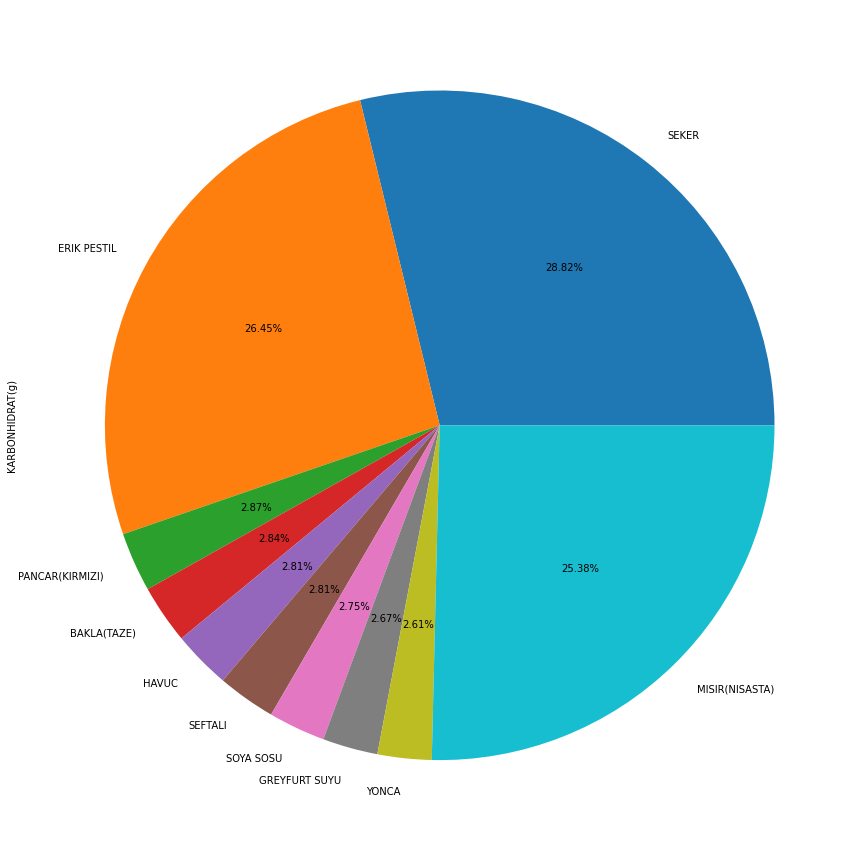

In [ ]:
stack_karbonhidrat['KARBONHIDRAT(g)'].plot.pie(subplots = True ,labels = stack_karbonhidrat['BESINLER'] ,figsize = (15,30),autopct = '%1.2f%%' )

# 6.DİYET PROGRAMI HAZIRLANIŞI
 Her yaş grubunun alması gereken günlük enerji (kkal bakımından) belirlidir. Öncelik bunların belirlenmesi ardından da karbonhidrat , protein ve yağ bakımından yemek listesi hazırlanır.


# ÖNCELİKLE YAŞ - ENERJİ TABLOMUZU İNCELEYELİM 

In [ ]:
yas_enerji

,YAS,G.ENERJI(kkal)
0,0-6 AY,545
1,7-12 AY,710
2,1-3,1250
3,4-6,1650
4,7-9,1870
5,ERKEK(10-13),2445
6,ERKEK(14-18),2860
7,ERKEK(19-30),2850
8,ERKEK(31-50),2623
9,ERKEK(51-65),2250


In [ ]:
yas_enerji.describe() #yaş-enerji tablosunun istatistiği

,G.ENERJI(kkal)
count,17.000000
mean,1974.411765
std,651.338147
min,545.000000
25%,1790.000000
50%,2100.000000
75%,2260.000000
max,2860.000000


In [ ]:
yas_enerji.columns #yaş-enerji tablosunun kolonları 

Index(['YAS', 'G.ENERJI(kkal)'], dtype='object')

# **KULLANICIDAN İSTENİLEN YAŞ ARALIĞINA KARŞILIK GELEN GÜNLÜK ALMASI GEREKEN ENERJİYİ BULMA KISMI**

In [ ]:
result = []


key = input("Günlük alınması gereken enerjiyi bulmak için cinsiyet(cinsiyet belirtilmek istenirse) ve yaş aralığını giriniz..:")

with open("yas_enerji.csv" , encoding='Latin-1') as csv_file:
  for satir in csv_file:
    if key in satir:
      result.append(satir.split(',')[0:])
          
          
print('Günlük alması gereken kalori bakımından enerji = ',result[:])




In [ ]:
#Kullanıcı tarafından girilen bir yaş aralığının günlük alması gereken enerji miktarını veren kod 
yas = yas_enerji.set_index('YAS') #yas_enerji'nin içeriğini "YAS" sütununu index olacak şekilde yas'a kopyalıyoruz
yas_input = input("Yas aralıgınız : ") 
kkal = yas.loc[yas_input] 
kkal

Yas aralıgınız : 0-6 AY


G.ENERJI(kkal)    545
Name: 0-6 AY, dtype: int64

In [ ]:
gram = kkal["G.ENERJI(kkal)"]
gram / 4

516.25

# **YAŞ -ENERJİ BAKIMINDAN İLİŞKİLERİ GÖZLEMLEYEBİLMEK İÇİN GRAFİKLEŞTİRME AŞAMASI**

Text(0.5, 1.0, 'YAŞLARA GÖRE GÜNLÜK ALINMASI GEREKEN ENERJİ MİKTARLARI')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 158 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 158 missing from current font.
  font.set_text(s, 0, flags=flags)


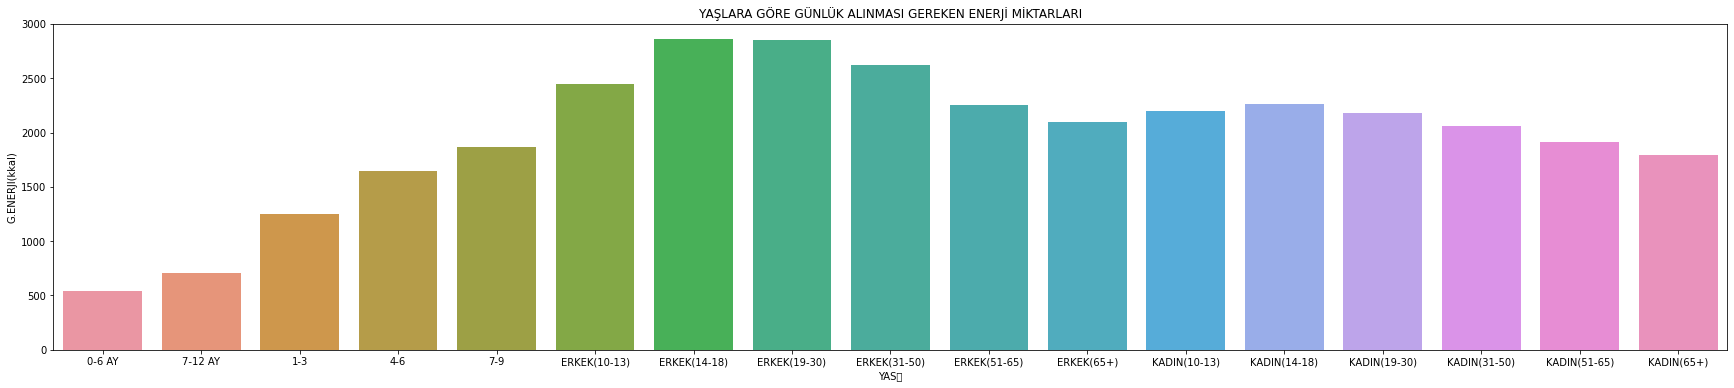

In [ ]:
plt.figure(figsize=(30,6),facecolor='white')
sns.barplot(x='YAS', y='G.ENERJI(kkal)', data=yas_enerji)
plt.title("YAŞLARA GÖRE GÜNLÜK ALINMASI GEREKEN ENERJİ MİKTARLARI")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd2b82cf828>],
      dtype=object)

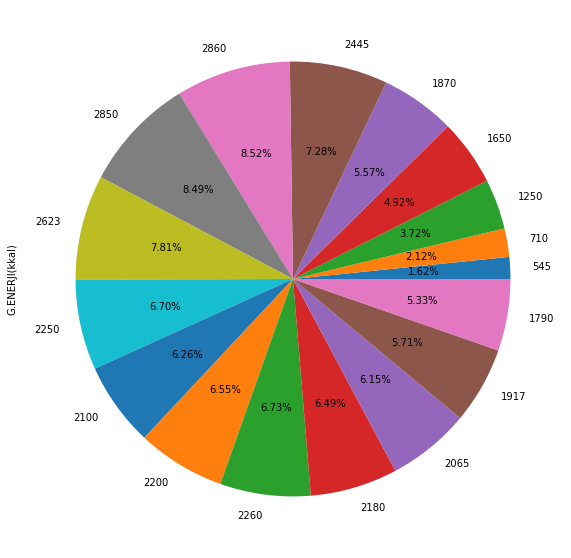

In [ ]:
yas_enerji['G.ENERJI(kkal)'].plot.pie(subplots = True ,labels = yas_enerji['G.ENERJI(kkal)'] ,figsize = (10,10),fontsize = 10 , autopct = '%1.2f%%' )

# ENERJİ BAŞINA GÜNLÜK ALINMASI GEREKEN ENERJİNİN KARBONHİDRAT , PROTEİN VE YAĞ BESİN TÜRÜNE GÖRE DAĞILIMI ;
  

1.   %60 Karbonhidrat (kkal/4)
2.   %15 Protein (kkal/4)
3.   %25 Yağ (kkal/9)


Örnek: 

*   2250 kkal günlük enerji ihtiyacı : (grama dönüştür (kkal/4)
*   337.5 g Karbonhidrat
*   84.4 g Protein
*   62.5 g Yağ 